# Web Scraping in Python

In this workshop, we will learn how to retrieve text data using web scraping methods. 

</br>

We will start by retrieving data from a single URL, then we will iterate this process across a list of URLs. 

</br>

We will then clean our text data and visualize our results using Word Clouds and Lexical Density. 

### Acknowledgements

This workshop is adapted from the following tutorials:
   - Martin Breuss, _Real Python_, [Beautiful Soup: Build a Web Scraper With Python](https://realpython.com/beautiful-soup-web-scraper-python/)
   - Brannon Seay, _Code X_, [A Beginner’s Guide to Easily Create a Word Cloud in Python](https://medium.com/codex/a-beginners-guide-to-easily-create-a-word-cloud-in-python-7c3078c705b7)
   - Melanie Walsh, _Introduction to Cultural Analytics_, Web Scraping  parts [I](https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/02-Web-Scraping-Part1.html) & [II](https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/03-Web-Scraping-Part2.html)
    

## What Is Web Scraping?
Web scraping is the process of gathering information from the Internet. </br>
Manually copying and pasting information from a website is a form of web scraping! </br>
However, “web scraping” usually involves automation.

Some websites don't mind web scraping while others have explicit terms of use against it (including most social media websites!) so always do your due diligence before scraping a website!

### Why use Web Scraping for Text Analysis?

Web scraping is an essential data collection method in the text analysis toolbox. 
It allows researchers to automate the collection of text data directly from websites that can then be used for analysis. 

### Drawbacks of Web Scraping

Data collected through web scraping is considered unstructured. It will exist as a disorganized string of letters and numbers. It is up to the researcher to organize the collected data, generally in tabular format, but not always. 

## Installing the Necessary Python Libraries 

The successfully to complete the workshop, you need the following libraries: 
- **Requests** for making data requests from URLs (installation required)
- **BeautifulSoup** for cleaning up and decoding HTML text data (installation required)
- **Pandas** for visualizing and manipulating tabular data (comes standard with Anaconda)
- **NLTK** for text normalizing and cleaning (comes standard with Anaconda, but an additional feature needs to be installed)
- **Glob** to connect to directories on your OS (comes standard with Python 3, no download necessary)
- **Word Cloud** to create visual representation of word frequencies (download required)
- **Matplotlib** to visualize the Word Clouds (comes standard with Python 3, no download necessary)


### Installing the "requests" library

To web scrape, we need tools to make requests. The most common library for making requests in Python is ["requests"](https://pypi.org/project/requests/).

Since the "requests" library is not part of the standard Python library, we need to install it first.

Working from your computer Terminal (make sure you see the % or $ symbol. If you don't see one, just open a new terminal window from the top toolbar (shell/new_window), type the following command: 

```
conda install requests
```

When it prompts you to respond with y or n (i.e., yes or no), type 'y' and press enter.

When the installation in complete, your terminal should return to its base with the % or $ symbol.

### Installing the BeautifulSoup library

Beautiful Soup is a Python library for parsing structured data. It allows you to interact with HTML in a similar way to how you interact with a web page using developer tools. The library exposes a couple of intuitive functions you can use to explore the HTML you received. 

</br>
Run the following code in your terminal to install Beautiful Soup:

```
python -m pip install beautifulsoup4

```

When the installation in complete, your terminal should return to its base with the % or $ symbol.

### Installing the WordCloud library

Word Cloud creates visual representation of information or data. It shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.

Type the following into your terminal window:

```
conda install -c conda-forge wordcloud
```
When it prompts you to respond with y or n (i.e., yes or no), type y and press enter.

### Installing the NLTK Wordnet Dictionary

The WordNet English dictionary is part of the Natural Language Tool Kit (NLTK) in Python.

Run the following code directly from your Jupyter Notebook:

In [63]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rebeccakrisel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preparing your workspace

It's always important to set up your workspace at the start of any coding project. </br>
For this workshop, you will want to create a new folder. I generally create mine on my Desktop. </br>
Open your terminal window and type the following: </br>
```
cd Desktop
mkdir web_scraping_workshop

```
Next, navigate back to your root folder:</br>

```
cd ~

```

And launch Jupyter Notebooks. Because we are going to be making large data requests, we need to specify a larger data rate limit: </br>
```
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

```

Once Jupyter is open, navigate to your "web_scraping_workshop" folder and open a new Jupyter Notebook by clicking "New" in the top right corner and selecting "Python 3". Give your Notebook a name and you are good to go! </br>


## Web Scraping from a single URL

### Responses and Requests

When you type in a URL in your search address bar, you’re sending an HTTP request for a web page, and the server which stores that web page will accordingly send back a response, some web page data that your browser will render.

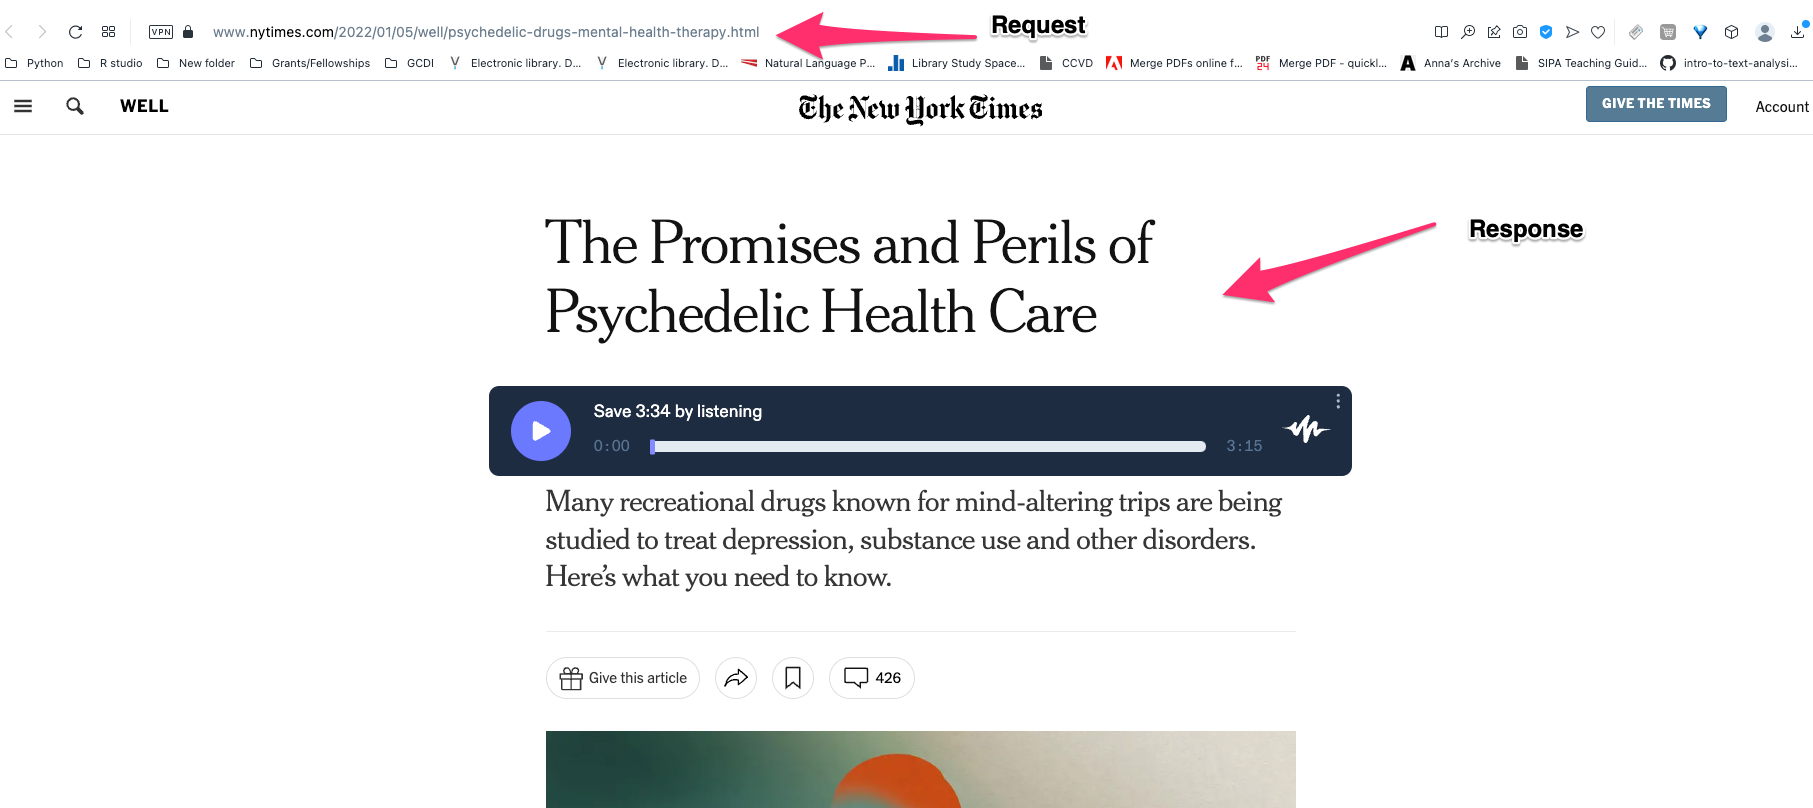

The process of connecting to a URL link for web scraping is similar. We use the "request" library to connect to the data stored within a URL. 

To start, we need to bring in our "requests" library into our Python environment:

In [64]:
import requests

Let's make our first request. This is a URL to an article on the Associated Press website:

In [65]:
response = requests.get("https://apnews.com/article/business-health-north-america-post-traumatic-stress-disorder-ap-top-news-af93ce6f3daf4a8b97f21b9cde196cda")

Next, we can check to see whether or not the request was successful:

In [66]:
response

<Response [200]>

We get a 200 status code, which means our request was successful! Read here for more on status codes: https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In order to get the text data from the response we need to apply the .text method, and we can save the results in a new varibale hltm_string. The results from the data request will be in [HTML format](https://www.udacity.com/blog/2021/04/html-for-dummies.html). 

In [67]:
html_string = response.text
print(html_string)

<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1"><link data-rh="true" rel="manifest" href="/manifest.json"/><link data-rh="true" rel="icon" sizes="16x16" href="/branding/favicon/16.png"/><link data-rh="true" rel="icon" sizes="24x24" href="/branding/favicon/24.png"/><link data-rh="true" rel="icon" sizes="32x32" href="/branding/favicon/32.png"/><link data-rh="true" rel="icon" sizes="64x64" href="/branding/favicon/64.png"/><link data-rh="true" rel="icon" sizes="128x128" href="/branding/favicon/128.png"/><link data-rh="true" rel="icon" sizes="256x256" href="/branding/favicon/256.png"/><link data-rh="true" rel="apple-touch-icon" href="/branding/apple-touch/ap-news-apple-touch-152.png"/><link data-rh="true" rel="apple-touch-icon" sizes="152x152" href="/branding/apple-touch/ap-news-apple-touch-152.png"/><link data-rh="true" rel="apple-touch-icon" sizes="180x180" href="/branding/apple-touch/ap-news-apple-touch-180.pn

Let's bring in our [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) Python library to help us clean up and decode this HTML text data:

In [68]:
from bs4 import BeautifulSoup

Let's run our html_string variable through the Beautiful Soup object and use the get_text() function to extract the text from the HTML data. Then, let's use the print function to visualize our results:

In [69]:
soup = BeautifulSoup(html_string)
article = soup.get_text()
print(article)

Long trip: Psychedelic advocate nears goal of legal ecstasy | AP NewsAP NEWS Email:GoListenSectionsU.S. NewsWorld NewsPoliticsSportsEntertainmentBusinessTechnologyHealthScienceOdditiesLifestylePhotographyVideosListenSectionsAP Top NewsU.S. NewsWorld NewsAfricaAsia PacificAustraliaEuropeLatin AmericaMiddle EastPoliticsPresident BidenElection coverageCongressSupreme CourtSportsNBASuper BowlCollege basketballNHLMLBTennisEntertainmentFilm reviewsMoviesMusicTelevisionFashionBusinessU.S. economyFinancial marketsVideosTechnologyHealthCOVID-19MoreAP InvestigationsClimate and environmentOdditiesPhotographyTravelScienceAP Fact CheckLifestyleReligionPress ReleasesInflationRussia-Ukraine: A Year of WarTrump InvestigationsFilm reviewsSearchhttps://apnews.com/article/health-north-america-ma-state-wire-us-news-business-af93ce6f3daf4a8b97f21b9cde196cdaClick to copyhttps://apnews.com/article/health-north-america-ma-state-wire-us-news-business-af93ce6f3daf4a8b97f21b9cde196cdaClick to copyRelated topicsH

Let's save our results in a text file for future use: 

In [70]:
with open("AP_article.txt","w") as file:
    file.write(article)

You can check your "web_scraping_workshop" folder to make sure the "AP_article.txt" file was successfully saved:

In [71]:
! ls

AP_article.txt       psychedelic_news.csv web_scraping.ipynb


Success! Congrats on scraping your first news article!

## Web Scraping a sequence of URLs

We are now going to learn how to scrape text from a collection of URLs saved as a CSV file. 

The dataset we are using for this workshop is a corpus of news articles that I created from U.S. mainstream news outlets focused on the coverage of psychedelics from the 1990s until 2021. You can download the dataset here: https://drive.google.com/drive/folders/1bLN8ri2sxXdx2t3aXz272fSCZF8vQn6A?usp=sharing. Make sure to save it in your "web_scraping_workshop" folder.

In order to use this dataset, we need to bring it into our Python environment. For this we will use the Pandas library. 

In [72]:
import pandas as pd

In [73]:
data_df= pd.read_csv("psychedelic_news.csv", delimiter=',', encoding='utf-8')

In [74]:
data_df

Date       publication  \
0    12/31/98  Associated Press   
1     1/19/00  Associated Press   
2      9/3/01  Associated Press   
3     11/4/05  Associated Press   
4     7/11/06  Associated Press   
..        ...               ...   
419   9/27/20   Washington Post   
420   10/8/20   Washington Post   
421   11/4/20   Washington Post   
422    4/4/21   Washington Post   
423    1/7/14     Washingtonian   

                                              headline             author 1  \
0     Ethicists question experiment with hallucinogens         Erica Noonan   
1    Peyote thrives in South Texas; Native American...       Mary Lee Grant   
2    Mexican herb sparks interest as legal - for no...       Andrew Bridges   
3    Study: Religious use of peyote not harmful to ...    Michael Kunzelman   
4        Mushroom Drug Produces Mystical Experience           Malcom Ritter   
..                                                 ...                  ...   
419        Who Will Benefit from Psychedelic Medicine?      Whitney Joiner    
420  D.C. voters to weigh in on 'magic mushroom' de...    Justin Wm. Moyer    
421  D.C. voters appear to favor decriminalizing th...    Justin Wm. Moyer    
422  A new treatment may halt cluster headaches. Bu...   Katherine Ellison    
423                                        Smoking Gun  Jennifer Mendelsohn   

    author 2                                                URL  
0        NaN                                                NaN  
1        NaN                                                NaN  
2        NaN                                                NaN  
3        NaN                                                NaN  
4        NaN                                                NaN  
..       ...                                                ...  
419      NaN  https://www.washingtonpost.com/magazine/2020/0...  
420      NaN  https://www.washingtonpost.com/local/dc-mushro...  
421      NaN  https://www.washingtonpost.com/local/dc-politi...  
422      NaN  https://www.washingtonpost.com/health/cluster-...  
423      NaN  https://www.washingtonian.com/2014/01/07/profe...  

[424 rows x 6 columns]

### Exploring & Cleaning our Dataframe

As always, let's examine our dataframe first before we use it to perform any kind of calculation or automation. 

Let's explore our data types:

In [75]:
data_df.dtypes

Date           object
publication    object
headline       object
author 1       object
author 2       object
URL            object
dtype: object

It looks like our date is stored as an object (meaning string) instead of a datatime value. Let's convert it (note: the format must match the current format of the data in the column)

In [76]:
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%m/%d/%y')

Let's check our data types again to make sure the conversion worked:

In [77]:
data_df.dtypes

Date           datetime64[ns]
publication            object
headline               object
author 1               object
author 2               object
URL                    object
dtype: object

Success! Our data is stored in the proper datatypes!

Let's look at our dataframe again:

In [78]:
data_df

Date       publication  \
0   1998-12-31  Associated Press   
1   2000-01-19  Associated Press   
2   2001-09-03  Associated Press   
3   2005-11-04  Associated Press   
4   2006-07-11  Associated Press   
..         ...               ...   
419 2020-09-27   Washington Post   
420 2020-10-08   Washington Post   
421 2020-11-04   Washington Post   
422 2021-04-04   Washington Post   
423 2014-01-07     Washingtonian   

                                              headline             author 1  \
0     Ethicists question experiment with hallucinogens         Erica Noonan   
1    Peyote thrives in South Texas; Native American...       Mary Lee Grant   
2    Mexican herb sparks interest as legal - for no...       Andrew Bridges   
3    Study: Religious use of peyote not harmful to ...    Michael Kunzelman   
4        Mushroom Drug Produces Mystical Experience           Malcom Ritter   
..                                                 ...                  ...   
419        Who Will Benefit from Psychedelic Medicine?      Whitney Joiner    
420  D.C. voters to weigh in on 'magic mushroom' de...    Justin Wm. Moyer    
421  D.C. voters appear to favor decriminalizing th...    Justin Wm. Moyer    
422  A new treatment may halt cluster headaches. Bu...   Katherine Ellison    
423                                        Smoking Gun  Jennifer Mendelsohn   

    author 2                                                URL  
0        NaN                                                NaN  
1        NaN                                                NaN  
2        NaN                                                NaN  
3        NaN                                                NaN  
4        NaN                                                NaN  
..       ...                                                ...  
419      NaN  https://www.washingtonpost.com/magazine/2020/0...  
420      NaN  https://www.washingtonpost.com/local/dc-mushro...  
421      NaN  https://www.washingtonpost.com/local/dc-politi...  
422      NaN  https://www.washingtonpost.com/health/cluster-...  
423      NaN  https://www.washingtonian.com/2014/01/07/profe...  

[424 rows x 6 columns]

Notice the NaN values in both the author_2 and URL columns. Pandas has special ways of dealing with missing data. Blank rows in a CSV file show up as NaN in a Pandas DataFrame. </br>
- For readability, let's fill in those missing values with something other than NaN:</br>
    - For the missing author_2 values, let's change it to "no second author"</br>
    - For the missing URL values, let's change it to "no URL found"</br>

In [79]:
data_df['author 2']=data_df['author 2'].fillna('no second author')

In [80]:
data_df['URL']=data_df['URL'].fillna('no URL found')

Let's take a look at our Dataframe to make sure we successfully changed the values in the "author_2" and "URL" columns:

In [81]:
data_df

Date       publication  \
0   1998-12-31  Associated Press   
1   2000-01-19  Associated Press   
2   2001-09-03  Associated Press   
3   2005-11-04  Associated Press   
4   2006-07-11  Associated Press   
..         ...               ...   
419 2020-09-27   Washington Post   
420 2020-10-08   Washington Post   
421 2020-11-04   Washington Post   
422 2021-04-04   Washington Post   
423 2014-01-07     Washingtonian   

                                              headline             author 1  \
0     Ethicists question experiment with hallucinogens         Erica Noonan   
1    Peyote thrives in South Texas; Native American...       Mary Lee Grant   
2    Mexican herb sparks interest as legal - for no...       Andrew Bridges   
3    Study: Religious use of peyote not harmful to ...    Michael Kunzelman   
4        Mushroom Drug Produces Mystical Experience           Malcom Ritter   
..                                                 ...                  ...   
419        Who Will Benefit from Psychedelic Medicine?      Whitney Joiner    
420  D.C. voters to weigh in on 'magic mushroom' de...    Justin Wm. Moyer    
421  D.C. voters appear to favor decriminalizing th...    Justin Wm. Moyer    
422  A new treatment may halt cluster headaches. Bu...   Katherine Ellison    
423                                        Smoking Gun  Jennifer Mendelsohn   

             author 2                                                URL  
0    no second author                                       no URL found  
1    no second author                                       no URL found  
2    no second author                                       no URL found  
3    no second author                                       no URL found  
4    no second author                                       no URL found  
..                ...                                                ...  
419  no second author  https://www.washingtonpost.com/magazine/2020/0...  
420  no second author  https://www.washingtonpost.com/local/dc-mushro...  
421  no second author  https://www.washingtonpost.com/local/dc-politi...  
422  no second author  https://www.washingtonpost.com/health/cluster-...  
423  no second author  https://www.washingtonian.com/2014/01/07/profe...  

[424 rows x 6 columns]

Success! 

</br>

Finally, let's check for duplicates:

In [82]:
data_df[data_df.duplicated(keep=False)]

Empty DataFrame
Columns: [Date, publication, headline, author 1, author 2, URL]
Index: []

There are no duplicates in our dataset!

### Autamating the Retrieval of Data from URLs 

Each article in this CSV file is paired with a URL. How can we actually use these URLs to get computationally tractable text data?

Though we could manually navigate to each URL and copy/paste each article into a file, that would be painstakingly slow, and we would lose crucial data in the process, for example information that might help us automatically distinguish the article headline from the body of the article. It would be much better to programmatically access the text data attached to every URL.

The automation process won't run if we have values in our URL columns that are not actual URLs. So we must drop our "no URL found" values from the "URL" column. 

In [83]:
index_names = data_df[ data_df['URL'] == 'no URL found' ].index
data_df.drop(index_names, inplace = True)
data_df

Date       publication  \
7   2010-04-23  Associated Press   
8   2011-01-05  Associated Press   
9   2016-12-01  Associated Press   
10  2018-11-01  Associated Press   
11  2019-03-06  Associated Press   
..         ...               ...   
419 2020-09-27   Washington Post   
420 2020-10-08   Washington Post   
421 2020-11-04   Washington Post   
422 2021-04-04   Washington Post   
423 2014-01-07     Washingtonian   

                                              headline             author 1  \
7    Study finds psychedelic trips help in anxiety ...        Malcom Ritter   
8    Deaths haunt scientist whose psychedelic chemi...      Seth Borenstein   
9    Magic mushroom' psychedelic may ease anxiety, ...        Malcom Ritter   
10   Long trip: Psychedelic advocate nears goal of ...      Matthew Perrone   
11   FDA allows treatment of depression with club d...      Matthew Perrone   
..                                                 ...                  ...   
419        Who Will Benefit from Psychedelic Medicine?      Whitney Joiner    
420  D.C. voters to weigh in on 'magic mushroom' de...    Justin Wm. Moyer    
421  D.C. voters appear to favor decriminalizing th...    Justin Wm. Moyer    
422  A new treatment may halt cluster headaches. Bu...   Katherine Ellison    
423                                        Smoking Gun  Jennifer Mendelsohn   

             author 2                                                URL  
7    no second author  https://www.chron.com/news/health/article/Stud...  
8    no second author  http://archive.boston.com/news/science/article...  
9    no second author  https://apnews.com/article/a9186f73cc6e4aa2b5e...  
10   no second author  https://apnews.com/article/business-health-nor...  
11   no second author  https://apnews.com/article/politics-business-h...  
..                ...                                                ...  
419  no second author  https://www.washingtonpost.com/magazine/2020/0...  
420  no second author  https://www.washingtonpost.com/local/dc-mushro...  
421  no second author  https://www.washingtonpost.com/local/dc-politi...  
422  no second author  https://www.washingtonpost.com/health/cluster-...  
423  no second author  https://www.washingtonian.com/2014/01/07/profe...  

[402 rows x 6 columns]

It looks like we have 402 rows. While it is possible to run a script to collect data from a large number of articles (the actual number will depend on the RAM space on your computer), this can take a lot of time and can cause computer crashes. Instead, I prefer working in batches. 

For this workshop, let's select a random sample of 10 articles and set the resulting dataframe equal to a new variable "sample_urls":

In [84]:
sample_urls = data_df.sample(10)
sample_urls

Date     publication  \
89  2021-11-02        Fox News   
82  2020-01-24        Fox News   
159 2017-07-17  New York Times   
273 2016-11-30            Vice   
283 2017-05-02            Vice   
109 2020-02-17        Guardian   
235 2021-05-10   Rolling Stone   
321 2018-06-26            Vice   
264 2016-03-26            Vice   
253 2014-07-02            Vice   

                                              headline            author 1  \
89   Detroit residents voting on whether to decrimi...           Paul Best   
82   Party drug MDMA a step closer to legalization ...       Andrew Keiper   
159  Can Psychedelics Be Therapy? Allow Research to...    Aaron E. Carroll   
273  The Government Gets One Step Closer to Approvi...    Madison Margolin   
283  Scientists Find More Evidence That MDMA Could ...  Alexander Iadarola   
109  Psychedelic drugs have lost their cool. Blame ...         John Semley   
235  How a Psychedelic 12-Step Program Is Saving Lives      Jonathan Reiss   
321  Psychedelics Are Going Mainstream, Because the...          Katie Bain   
264  Talking Acid Trips and Drug Legalization with ...      William Mathis   
253  Kicking Addiction by Going from Heroin to Meth...         Chem Squier   

             author 2                                                URL  
89   no second author  https://www.foxnews.com/us/detroit-residents-v...  
82   no second author  https://www.foxnews.com/health/mdma-one-step-c...  
159  no second author  https://www.nytimes.com/2017/07/17/upshot/can-...  
273  no second author  https://www.vice.com/en/article/d7ykea/the-gov...  
283  no second author  https://www.vice.com/en/article/z4jbza/mdma-pt...  
109  no second author  https://www.theguardian.com/commentisfree/2020...  
235  no second author  https://www.rollingstone.com/culture/culture-f...  
321  no second author  https://www.vice.com/en/article/bj3ezm/psyched...  
264  no second author  https://www.vice.com/en/article/bnpe93/talking...  
253  no second author  https://www.vice.com/en/article/7b7ekd/can-a-p...

Now that we have a sample dataset, let's set up our code for scraping the text from the list of URLs stored in the URL column. </br>

Let's create a new function called scrape_article() that includes our requests.get() and response.text code.

In [85]:
def scrape_article(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string

Let's apply our scrape_article function to the “URL” column of the DataFrame and create a new column "text" for the resulting extracted text:

In [86]:
sample_urls['text'] = sample_urls['URL'].apply(scrape_article)

Let's take a look at our new dataframe:

In [87]:
sample_urls

Date     publication  \
89  2021-11-02        Fox News   
82  2020-01-24        Fox News   
159 2017-07-17  New York Times   
273 2016-11-30            Vice   
283 2017-05-02            Vice   
109 2020-02-17        Guardian   
235 2021-05-10   Rolling Stone   
321 2018-06-26            Vice   
264 2016-03-26            Vice   
253 2014-07-02            Vice   

                                              headline            author 1  \
89   Detroit residents voting on whether to decrimi...           Paul Best   
82   Party drug MDMA a step closer to legalization ...       Andrew Keiper   
159  Can Psychedelics Be Therapy? Allow Research to...    Aaron E. Carroll   
273  The Government Gets One Step Closer to Approvi...    Madison Margolin   
283  Scientists Find More Evidence That MDMA Could ...  Alexander Iadarola   
109  Psychedelic drugs have lost their cool. Blame ...         John Semley   
235  How a Psychedelic 12-Step Program Is Saving Lives      Jonathan Reiss   
321  Psychedelics Are Going Mainstream, Because the...          Katie Bain   
264  Talking Acid Trips and Drug Legalization with ...      William Mathis   
253  Kicking Addiction by Going from Heroin to Meth...         Chem Squier   

             author 2                                                URL  \
89   no second author  https://www.foxnews.com/us/detroit-residents-v...   
82   no second author  https://www.foxnews.com/health/mdma-one-step-c...   
159  no second author  https://www.nytimes.com/2017/07/17/upshot/can-...   
273  no second author  https://www.vice.com/en/article/d7ykea/the-gov...   
283  no second author  https://www.vice.com/en/article/z4jbza/mdma-pt...   
109  no second author  https://www.theguardian.com/commentisfree/2020...   
235  no second author  https://www.rollingstone.com/culture/culture-f...   
321  no second author  https://www.vice.com/en/article/bj3ezm/psyched...   
264  no second author  https://www.vice.com/en/article/bnpe93/talking...   
253  no second author  https://www.vice.com/en/article/7b7ekd/can-a-p...   

                                                  text  
89   <!doctype html>\n<html data-n-head-ssr lang="e...  
82   <!doctype html>\n<html data-n-head-ssr lang="e...  
159  <html><head><title>nytimes.com</title><style>#...  
273  <!DOCTYPE html><html lang="en" dir="ltr"><head...  
283  <!DOCTYPE html><html lang="en" dir="ltr"><head...  
109  <!doctype html>\n        <html lang="en">\n   ...  
235  <!DOCTYPE html>\n<!--[if IE 6]>\n<html id="ie6...  
321  <!DOCTYPE html><html lang="en" dir="ltr"><head...  
264  <!DOCTYPE html><html lang="en" dir="ltr"><head...  
253  <!DOCTYPE html><html lang="en" dir="ltr"><head...

### Retrieving the text from each URL

In the next few steps, we are going to build our for loop that will automate the process of retrieving the text from each URL. We will do this in steps to check what each line in the for loop is doing. 

</br>

Let's start by looking at the data stored in our "text" column:

In [88]:
for text in sample_urls['text']:
    print(text)

<!doctype html>
<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">
  <head>
    <title>Detroit residents voting on whether to decriminalize &#x27;magic mushrooms&#x27; and other psychedelic drugs | Fox News</title><meta data-n-head="ssr" http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"><meta data-n-head="ssr" data-hid="content-type" http-equiv="content-type" content="text/html; charset=UTF-8"><meta data-n-head="ssr" data-hid="x-dns-prefetch-control" http-equiv="x-dns-prefetch-control" content="on"><meta data-n-head="ssr" charset="UTF-8"><meta data-n-head="ssr" data-hid="viewport" name="viewport" content="width=device-width, minimum-scale=1.0, initial-scale=1.0"><meta data-n-head="ssr" data-hid="content-language" http-equiv="content-language" content="en"><meta data-n-head="ssr" data-hid="description" name="description" content="Detroit could be the latest big city to decriminalize “magic mushrooms” and other psychedelics drugs as residents t

We can see that our data is in HTML format and is hard to read. Let's run our data through our BeautifulSoup object, apply the get_text() function, and visualize our results using the print function:

In [89]:
for text in sample_urls['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()
    print(article)



Detroit residents voting on whether to decriminalize 'magic mushrooms' and other psychedelic drugs | Fox News


Fox News   U.S.PoliticsMediaOpinionBusinessEntertainmentSportsLifestyleWeatherTVFox NationListen More Expand / Collapse search Login Watch TV Menu Hot Topics    Coronavirus U.S. CrimeMilitaryEducationTerrorImmigrationEconomyPersonal FreedomsFox News InvestigatesWorld U.N.ConflictsTerrorismDisastersGlobal EconomyEnvironmentReligionScandalsOpinion Politics ExecutiveSenateHouseJudiciaryForeign PolicyPollsElectionsEntertainment Celebrity NewsMoviesTV NewsMusic NewsStyle NewsEntertainment VideoBusiness Personal FinanceEconomyMarketsWatchlistLifestyleReal EstateTechLifestyle Food + DrinkCars + TrucksTravel + OutdoorsHouse + HomeFitness + Well-beingStyle + BeautyFamilyFaithScience ArchaeologyAir & SpacePlanet EarthWild NatureNatural ScienceDinosaursTech SecurityInnovationDronesComputersVideo GamesMilitary TechHealth CoronavirusHealthy LivingMedical ResearchMental HealthCancerHeart

Scientists Find More Evidence That MDMA Could Be Used to Treat PTSDSign InCreate Account+ EnglishVICEVideoTVNewsTechRec RoomFoodWorld NewsThe 8:46 ProjectGamesMusicHealthMoneyDrugsIdentityEntertainmentEnvironmentTravelHoroscopesSexVICE MagazineThe Gender Spectrum CollectionShop MerchVICESign InCreate AccountVideoTVPodcastsAppsNewslettersVICE Voices Rec RoomInput for searching articles, videos, showsNewsTechRec RoomFoodWorld NewsThe 8:46 ProjectGamesMusicHealthMoneyDrugsIdentityEntertainmentEnvironmentTravelHoroscopesSexVICE MagazineThe Gender Spectrum CollectionShop MerchAbout JobsPartnerVICE VoicesContent Funding on VICESecurity PolicyPrivacy & TermsAccessibility Statement© 2023 VICE MEDIA GROUPFYI.This story is over 5 years old.Scientists Find More Evidence That MDMA Could Be Used to Treat PTSDResearchers based in California presented their new findings at an Oakland conference last week.AIby Alexander IadarolaMay 2, 2017, 4:48pmShareTweetSnapCortesía de Wikipedia CommonsResearchers 












Psychedelic 12-Step Program: How a New Approach Is Saving Lives – Rolling Stone














 











































 
































 











































































×





 





















×




			Skip to main content		


















 Rollingstone Logo







Click to expand the Mega Menu








Click to Expand Search Input





Search for:














	Music



	Politics



	TV & Movies



	(Sub)Culture



	RS Recommends









	Got A Tip?




	Account




	Welcome



	Get Digital Access



	Manage Digital Account



	Manage Print Account



	Sign Out







	Log In

	Subscribe


















Click to expand the Mega Menu








Click to Expand Search Input





Search for:










 Rollingstone Logo






	(Sub)Culture



	
		
					How a Psychedelic 12-Step Program Is Saving Lives		
			





facebook-rs







twitter







email










	Got A Tip?




	Account




Now, let's keep building our for loop, and save our data as a text file:

In [90]:
with open("all_articles.txt","w") as file:
    for text in sample_urls['text']:
        soup = BeautifulSoup(text)
        article = soup.get_text()
        file.write(article)
        

Let's check the "all_articles.txt" text file saved in our web_scraping_workshop folder. We have all the articles saved in one doc. This may be a useful way to save our data for some forms of analysis. That being said, if we plan on running any type of comparative analysis, we will need to have them saved as separate files. 

</br>

Let's start by creating a new folder, "files", inside our web_scraping_workshop folder

In [91]:
! mkdir files

Next, let's build on our for loop and create a file naming schema to save each article as an individual text file. To do that, we are going to create an index (id =) that starts at 0 and use an f-string (f") to iterate the file naming process across our list of articles using the index to add a number:  


In [92]:
id = 0
for text in sample_urls['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()
    
    id += 1
    with open(f"files/article_{id}.txt", "w") as file:
        file.write(str(article))

Let's check our files folder to see if our results were sucessfully saved...

In [93]:
! cd files

In [94]:
! ls

AP_article.txt       files                web_scraping.ipynb
all_articles.txt     psychedelic_news.csv


Congrats, you just run your first autmation loop to web scrape a list of articles!

</br>

Before we move on, let's make sure to come back to the web_scraping_workshop

In [95]:
! cd ..

## Text Cleaning and Analysis

Now that we have our data saved in individual text files, we can run through the process of normalizing and cleaning our data. This includes making the text lowercase, stripping punctuation, and lemmatizing. 

</br>

Once we are done normalizing and cleaning our data, we can then visualize our results in Word Clouds and run a lexical density analysis. 

Let's start by importing all of our libraries:


In [96]:
import nltk

from nltk.corpus import stopwords
stops = stopwords.words('english')

from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud    
import matplotlib.pyplot as plt

import glob

Next, let's create two new folders within the "web_scraping_workshop" folder: one called "files_cleaned" where we will save our normalized and cleaned files and another called "wordclouds" where we will save our word cloud outputs

In [97]:
! mkdir files_cleaned

In [98]:
! mkdir wordclouds

Let's use the Glob library to connect to our "files" directory and set it equal to the variable "files." This will turn our file directory into a list of filepaths

In [99]:
directory = "files"
files = glob.glob(f"{directory}/*.txt")

Let's take a look at our "files" variable:

In [100]:
files

['files/article_7.txt',
 'files/article_6.txt',
 'files/article_4.txt',
 'files/article_5.txt',
 'files/article_1.txt',
 'files/article_10.txt',
 'files/article_2.txt',
 'files/article_3.txt',
 'files/article_8.txt',
 'files/article_9.txt']

We can see the contents of our "files" directory as a list. 

Let's create a function to derive the Part of Speech (POS) of given words. We will use this function to lemmatize our text based on the part of speech (POS) tag.

In [101]:
# Fcn source: https://medium.com/codex/a-beginners-guide-to-easily-create-a-word-cloud-in-python-7c3078c705b7
# and https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Let's build a for loop to clean the files saved in our "files" variable. 
We have a few steps:
- Create an index (id =) that starts at 0 and use an f-string (f") to iterate the file naming process across our list of articles using the index to add a number
- We start begin our for loop by telling Python to go through each item in the "files" list
- For each file path, we want Python to do the following:
    - open the text file attached to the filepath and set it equal to the variable "text"
    - transform the words in variable "text" into tokens and set it equal to the variable "text_tokens"
    - process "text_tokens" for use with NLTK and set it equal to the variable "nltk_text"
    - the next three steps make the tokens lower case and removes punctuation (text_lower), removes stop words (text_stops), and lemmatizes the tokens (text_clean) 


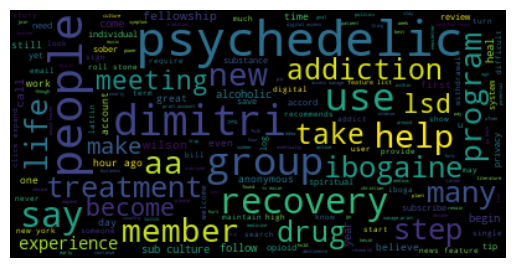

0.6683333333333333


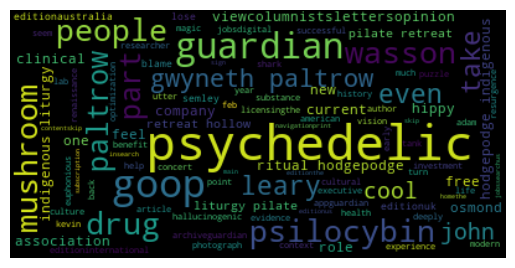

0.7516666666666667


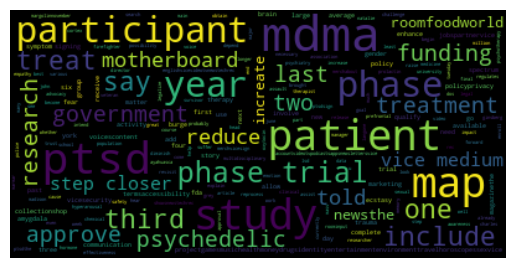

0.6148325358851675


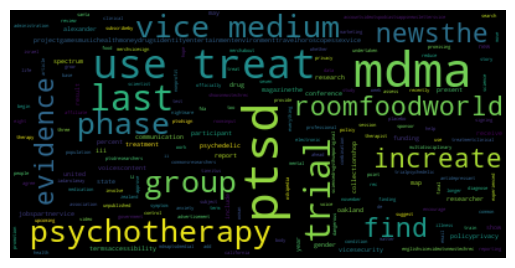

0.6937984496124031


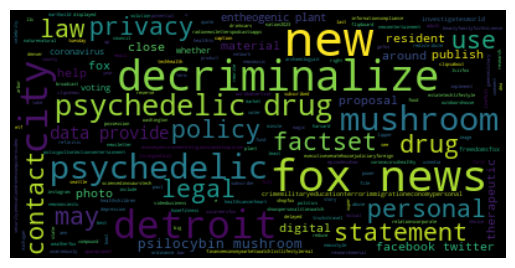

0.62


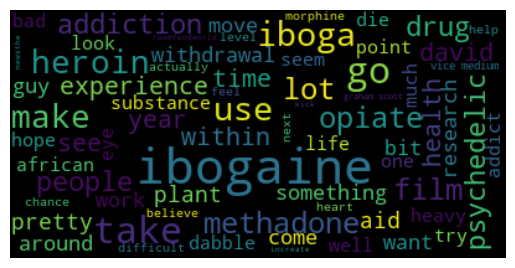

0.6


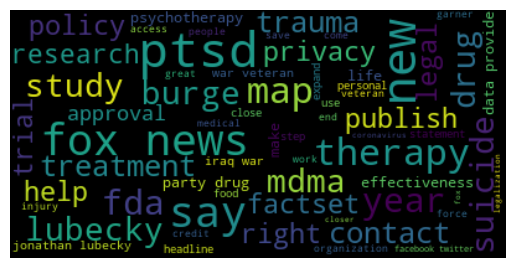

0.66


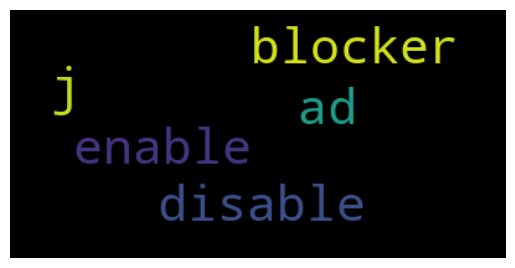

1.0


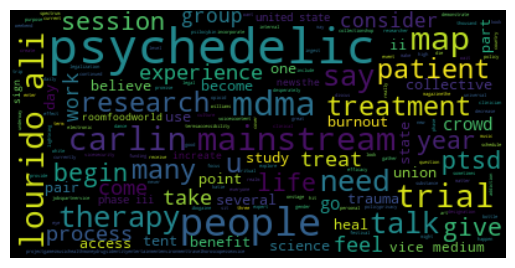

0.7233333333333334


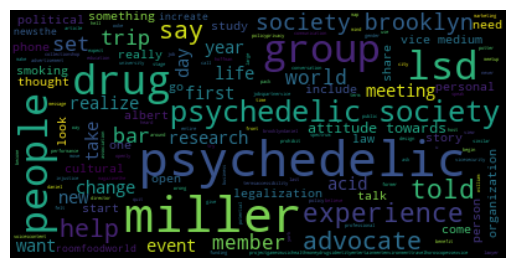

0.6416666666666667
[{'File_name': 'files/article_7.txt', 'lexical_density': 0.6683333333333333}, {'File_name': 'files/article_6.txt', 'lexical_density': 0.7516666666666667}, {'File_name': 'files/article_4.txt', 'lexical_density': 0.6148325358851675}, {'File_name': 'files/article_5.txt', 'lexical_density': 0.6937984496124031}, {'File_name': 'files/article_1.txt', 'lexical_density': 0.62}, {'File_name': 'files/article_10.txt', 'lexical_density': 0.6}, {'File_name': 'files/article_2.txt', 'lexical_density': 0.66}, {'File_name': 'files/article_3.txt', 'lexical_density': 1.0}, {'File_name': 'files/article_8.txt', 'lexical_density': 0.7233333333333334}, {'File_name': 'files/article_9.txt', 'lexical_density': 0.6416666666666667}]


In [102]:
id = 0
lexical_density = []  
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]
    
# save cleaned files

    id += 1
    with open(f"files_cleaned/article_cleaned_{id}.txt", "w") as file:
        file.write(str(text_clean))

# create Word Clouds
    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40).generate(unique_string)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# save Word Clouds

    id += 1
    wordcloud.to_file(f"wordclouds/word_cloud_{id}.png")

# Establish lexical density
    text_clean_slice = text_clean [0:600]
    ld_results = len(set(text_clean_slice)) / len(text_clean_slice)
    print(ld_results)
    ld_dict = {'File_name': filepath, 'lexical_density': ld_results}
    lexical_density.append(ld_dict)

print(lexical_density)

We can visualize the results of our lexical density analysis in a dataframe:

In [103]:
ld_df = pd.DataFrame(lexical_density)
ld_df = ld_df.sort_values(by='File_name', ascending=True)
ld_df


File_name  lexical_density
4   files/article_1.txt         0.620000
5  files/article_10.txt         0.600000
6   files/article_2.txt         0.660000
7   files/article_3.txt         1.000000
2   files/article_4.txt         0.614833
3   files/article_5.txt         0.693798
1   files/article_6.txt         0.751667
0   files/article_7.txt         0.668333
8   files/article_8.txt         0.723333
9   files/article_9.txt         0.641667

Congrats on making it to the end of this workshop! 
</br>
We've only scratched the surface in terms of the web scraping capabilities of Beautiful Soup. You could run a script to collect all the links of a web page. I've even used it to automatical download an archive of PDF files hosted on a URL. 
</br>
Happy coding!